In [39]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
ls

Data Dictionary.xls
Homework 2 – Machine Learning Pipeline.pdf
Untitled.ipynb
credit-data.csv


In [4]:
def 
data = pd.read_csv("credit-data.csv")

In [36]:
data_dict = pd.read_excel("Data Dictionary.xls")
data_dict = data_dict.rename(index=str, columns={"Unnamed: 0":"Variable Name", "Unnamed: 1": "Description","Unnamed: 2": "Type"})
data_dict = data_dict.drop(0, axis=0)


In [44]:
#find out which columns have missing values
data.columns[data.isna().any()].tolist()

['MonthlyIncome', 'NumberOfDependents']

### Question 3

In [50]:
#replace monthly income NaN values with average monthly income and Number of Dependent NaN values
#with the median (because you cant have .3 of a kid...)
mean_income = data['MonthlyIncome'].mean()
median_children = data['NumberOfDependents'].median()
imput = {'MonthlyIncome': mean_income, 'NumberOfDependents': median_children}
data.fillna(value=imput)



,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.000000,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.000000,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.000000,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.000000,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.000000,4,0,0,0,2.0
5,99033,0,0.142231,57,60601,0,0.015332,13500.000000,6,0,0,0,0.0
6,99044,0,0.047601,48,60601,0,0.474609,3583.000000,13,0,1,0,1.0
7,99048,0,0.022141,34,60601,0,0.003332,2700.000000,2,0,0,0,1.0
8,99056,0,0.241805,30,60601,0,0.864452,3400.000000,13,0,1,0,1.0
9,99058,0,0.036181,71,60601,0,0.568798,5050.000000,16,0,2,0,0.0


In [87]:
data.cov()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
PersonID,7.903252e+08,-6440.862646,28028.057820,44994.885968,-7078.588834,-12087.775651,2.501086e+05,7.525164e+06,3318.576632,-11214.443731,140.806905,-9497.874466,-958.255726
SeriousDlqin2yrs,-6.440863e+03,0.135354,-0.373931,-0.942550,-0.198634,0.286000,-6.438452e+00,-1.646730e+02,-0.076436,0.266593,-0.004517,0.231820,0.027184
RevolvingUtilizationOfUnsecuredLines,2.802806e+04,-0.373931,49114.958922,-26.156702,15.959616,-2.306314,6.391170e+03,1.709022e+04,-16.837332,-1.939116,1.217924,-1.619318,1.338603
age,4.499489e+04,-0.942550,-26.156702,217.470463,0.955756,-5.273548,7.421487e+02,9.311863e+03,12.276409,-5.284161,0.836603,-4.850300,-3.453104
zipcode,-7.078589e+03,-0.198634,15.959616,0.955756,143.624817,-0.151248,3.242932e+01,-8.026958e+02,-0.574988,-0.092500,0.043435,-0.074220,-0.023432
NumberOfTime30-59DaysPastDueNotWorse,-1.208778e+04,0.286000,-2.306314,-5.273548,-0.151248,27.098559,-7.839886e+01,-8.682656e+02,-1.916597,26.599446,-0.227422,26.602548,-0.044315
DebtRatio,2.501086e+05,-6.438452,6391.169927,742.148689,32.429319,-78.398861,1.679900e+06,-1.576075e+05,558.778884,-99.496623,265.984491,-89.046530,-92.323597
MonthlyIncome,7.525164e+06,-164.673025,17090.220553,9311.862610,-802.695804,-868.265622,-1.576075e+05,1.808171e+08,7523.507312,-1017.492119,2010.982983,-863.743457,938.540499
NumberOfOpenCreditLinesAndLoans,3.318577e+03,-0.076436,-16.837332,12.276409,-0.574988,-1.916597,5.587789e+02,7.523507e+03,27.116222,-2.653513,2.660352,-2.346176,0.351859
NumberOfTimes90DaysLate,-1.121444e+04,0.266593,-1.939116,-5.284161,-0.092500,26.599446,-9.949662e+01,-1.017492e+03,-2.653513,26.940066,-0.327355,26.621577,-0.088665


In [92]:
colz = list(data.columns)

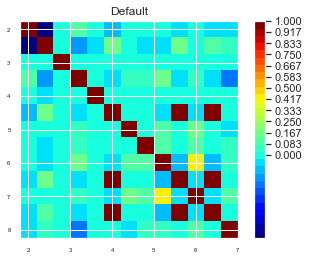

In [112]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Default')
    labels=col_nums 
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=tickz)
    plt.show()

correlation_matrix(data)

In [117]:
list(data.columns)

#get ride of person id and zipcode 

'NumberOfDependents'

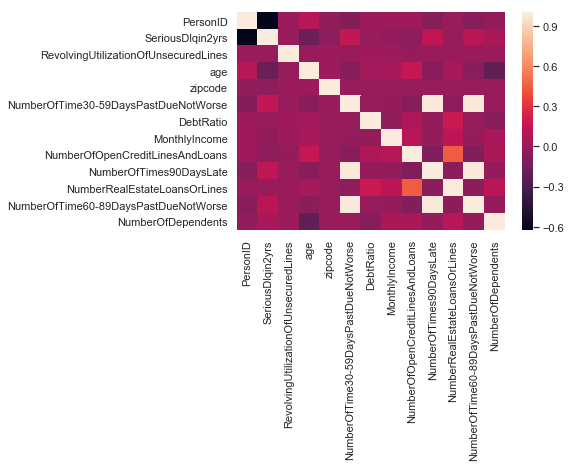

In [113]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression


def load_data(filename):
    df = pd.read_csv(filename)
    return df


"""
functions for preprocessing
"""


def impute(df, mean_cols=None, median_cols=None):
    for col in mean_cols:
        df[col] = df[col].fillna(df[col].mean())
    for col in median_cols:
        df[col] = df[col].fillna(df[col].median())
    return df


"""
feature generation
"""


def discretize(df, colname):
    """
    double check 

    this kind of analysis helps us with distributions have have a big skew, eg low medium high income not a string of numbers, more robust this way
    """
    # discretizes a continuous variable (using quartiles)
    df[colname] = pd.qcut(df[colname], 4, labels=[1, 2, 3, 4])
    return df


def dummy(df, colname):
    # takes a categorical variable and creates binary/dummy variables
    dummies = pd.get_dummies(df[colname]).rename(columns=lambda x: colname + "_" + str(x))
    df = pd.concat([df, dummies], axis=1)
    df = df.drop([colname], axis=1)
    return df


def get_xy(df, response, features):

    """
    choose features based on exploratory shit, eg look at some regressiona and figure out what is correlated 
    (dont include variables that are highly corrindated with each other) 
    """
    y = df[response].values
    X = df[features].values
    return X, y


def classify_lgreg(X, y):
    # builds a classifier
    lg = LogisticRegression()
    lg.fit(X, y)
    return lg


def accuracy(true_values, predicted_values):
    # computes the accuracy of the prediction
    return np.mean(true_values == predicted_values)

In [118]:
df

NameError: name 'df' is not defined

In [104]:
colz 

['PersonID',
 'SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'zipcode',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [108]:
col_nums = np.arange(1,14)

In [111]:
col_nums = list(col_nums)

In [96]:
len(colz)

13

In [99]:
tickz = np.linspace(0,1,13)

In [100]:
tickz = list(tickz)

In [89]:
lst = []

In [48]:
median_children

0.0

In [83]:
data.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [121]:
#Basic overview of people in dataset 
overview = {'Average Age': data["age"].mean(), 'Average Debt Ratio': data["DebtRatio"].mean(),'Average Monthly Income': data["MonthlyIncome"].mean(),
           "Average Outstanding Debt Divided by Credit Limit Sum": [data["RevolvingUtilizationOfUnsecuredLines"].mean()]}
overview_df = pd.DataFrame(data=overview).round(2)




In [124]:
data.columns

Index(['PersonID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

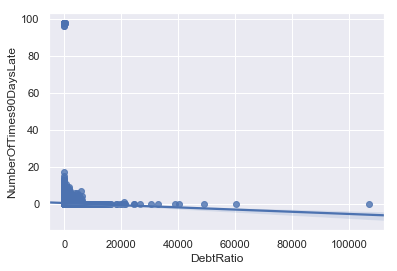

In [43]:
#regress percentage of the population in poverty with the number of battery crimes 
poverty_regression = sns.regplot(x="NumberOfTime60-89DaysPastDueNotWorse", y="NumberOfTimes90DaysLate", data=data)








In [34]:
data_dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,zipcode,zipcode of the borrower,interget/string
6,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
7,MonthlyIncome,Monthly income,real
8,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
9,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
